In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Loading Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#Importing the Model Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

#Importing Boosting Models
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier

#Importing Error Metrics
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_auc_score,roc_curve,auc,f1_score


In [ ]:
#Loading preprocessing pipline functions
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from scipy.stats import zscore

In [ ]:
# Uploading the dataset in jupyter Notebook.
df=pd.read_csv('/content/drive/MyDrive/Python_Datasets/Data file.csv')

In [ ]:
# Calling our dataset in jupyter Notebook.
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [ ]:
# checking the features, their shape, duplicate values and nan values in the Datasets

print("\nFeatures Present in the Dataset: \n", df.columns)
shape=df.shape
print("\nTotal Number of Rows : ",shape[0])
print("Total Number of Features : ", shape[1])
print("\n\nData Types of Features :\n", df.dtypes)
print("\nDataset contains any NaN/Empty cells : ", df.isnull().values.any())
print("\nTotal number of empty rows in each feature:\n", df.isnull().sum(),"\n\n")
print("Total number of unique values in each feature:")
for col in df.columns.values:
    print("Number of unique values of {} : {}".format(col, df[col].nunique()))
    
print ('\nCreditor and defaulter counts','\n',df.label.value_counts())


Features Present in the Dataset: 
 Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

Total Number of Rows :  209593
Total Number of Features :  37


Data Types of Features :
 Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
da

In [ ]:
# Checking out the information of columns in our dataset.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [ ]:
# Checking the total rows and columns in our dataset.
df.shape

(209593, 37)

In [ ]:
df.isna().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

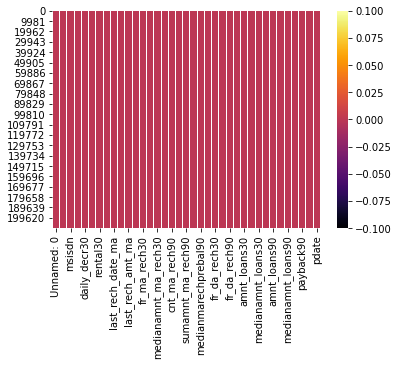

In [ ]:
#Checking of null values in our dataset by passing a heatmap function.

sns.heatmap(df.isnull(),cmap='inferno')

Observation : We observed that in our dataset there are no null values present.

## **Dropping Irrelevant columns**

In [ ]:
# Dropping Unnamed 0, msisdn,pdate,pcircle feature from our dataset as it is not giving any insights for our machine learning.
df.drop(['msisdn','pdate','pcircle','Unnamed: 0'],axis=1, inplace=True)

In [ ]:
list=[]
for i in df.columns:
    if df[i].dtypes!='object':
        list.append(i)
list

['label',
 'aon',
 'daily_decr30',
 'daily_decr90',
 'rental30',
 'rental90',
 'last_rech_date_ma',
 'last_rech_date_da',
 'last_rech_amt_ma',
 'cnt_ma_rech30',
 'fr_ma_rech30',
 'sumamnt_ma_rech30',
 'medianamnt_ma_rech30',
 'medianmarechprebal30',
 'cnt_ma_rech90',
 'fr_ma_rech90',
 'sumamnt_ma_rech90',
 'medianamnt_ma_rech90',
 'medianmarechprebal90',
 'cnt_da_rech30',
 'fr_da_rech30',
 'cnt_da_rech90',
 'fr_da_rech90',
 'cnt_loans30',
 'amnt_loans30',
 'maxamnt_loans30',
 'medianamnt_loans30',
 'cnt_loans90',
 'amnt_loans90',
 'maxamnt_loans90',
 'medianamnt_loans90',
 'payback30',
 'payback90']

In [ ]:
# The abs() function is used to return the absolute value of a number.
for y in list:
    df[y]=abs(df[y])

In [ ]:
df

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000
209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000


In [ ]:

df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.808718,5381.431293,6082.544140,2715.376558,3509.497148,3756.125844,3712.204801,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3854.219020,6.31543,7.716780,12396.218352,1864.595821,94.436315,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.032666,9220.606472,10918.796572,4294.257439,5754.630600,53905.872857,53374.833299,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.210975,7.19347,12.590251,16857.793882,2081.680664,368.606406,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.453000,42.693333,299.700000,330.000000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.670000,2.00000,0.000000,2317.000000,773.000000,15.300000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1095.750000,1347.220000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,35.000000,4.00000,2.000000,7226.000000,1539.000000,37.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3362.350000,4204.510000,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,85.300000,8.00000,8.000000,16000.000000,1924.000000,81.500000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.00000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


Observations:

Apart from label column in all the other columns mean is greater than median(50%) which shows it is right skewed and its 75% and max difference is very high which shows there are outliers present in it.


# Exploratory Data Analysis

# Visualization

Univariate analysis

1    183431
0     26162
Name: label, dtype: int64


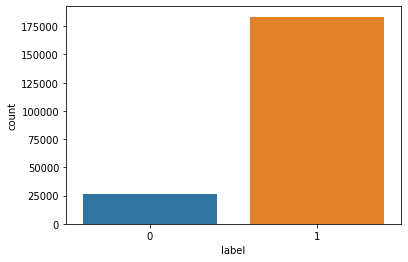

In [ ]:
sns.countplot(df['label'])
print(df['label'].value_counts())

We observe that in our target variable their are two attributes 0 & 1.
0= Defaulter 26162
1= Non-Defaulter 183431


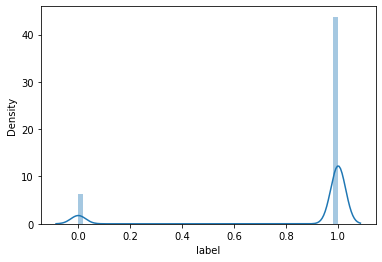

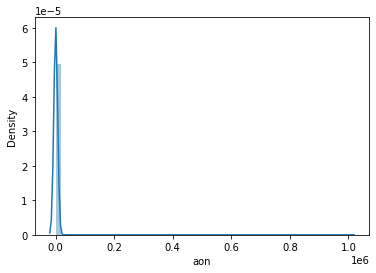

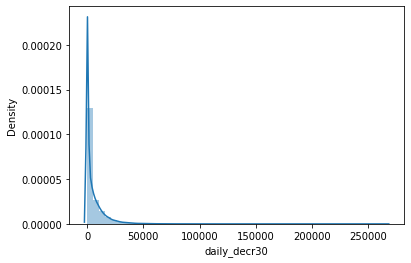

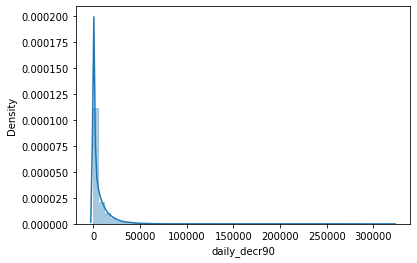

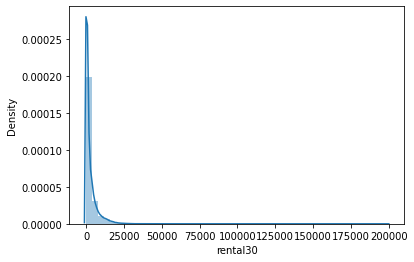

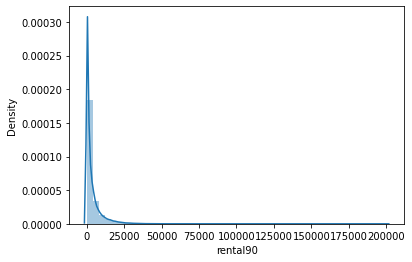

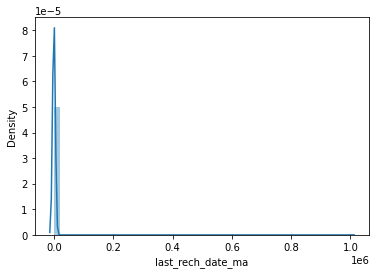

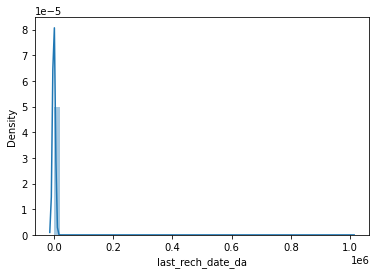

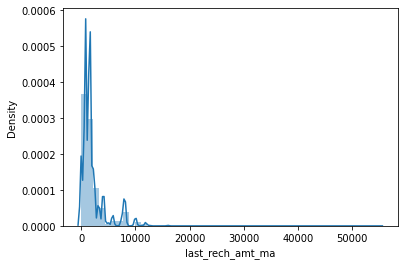

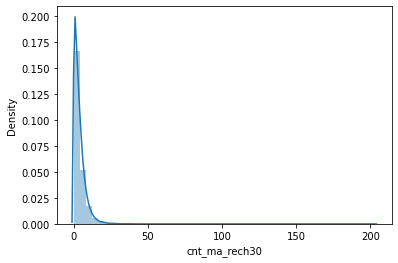

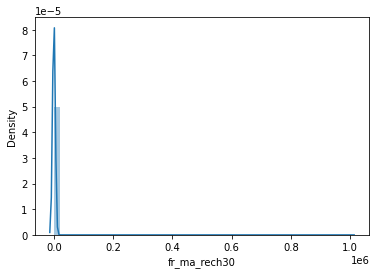

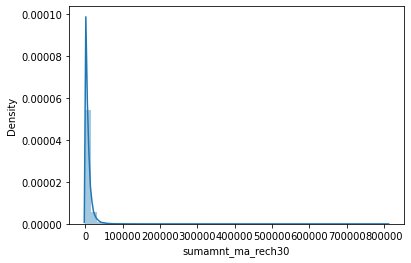

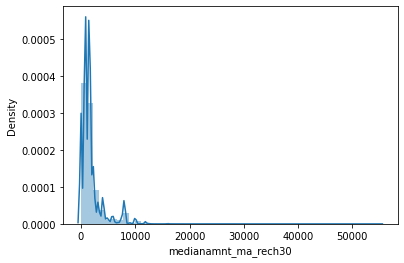

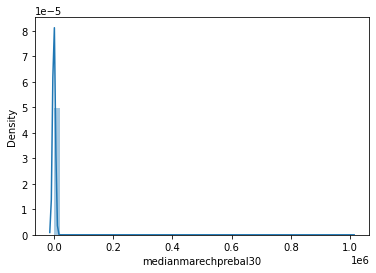

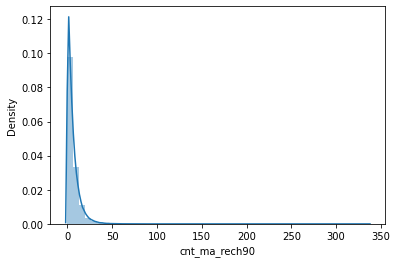

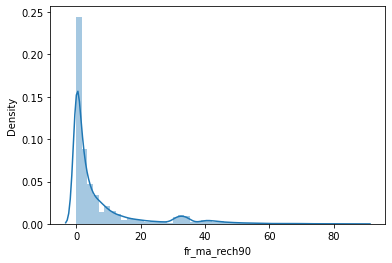

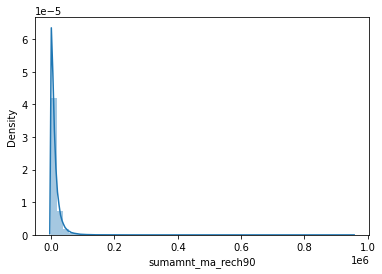

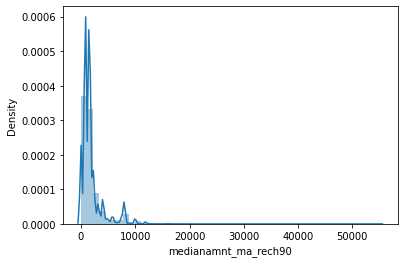

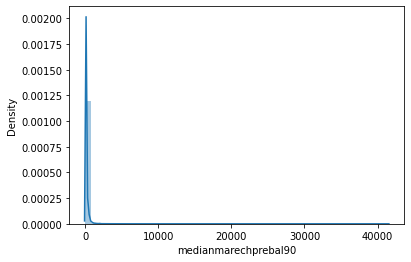

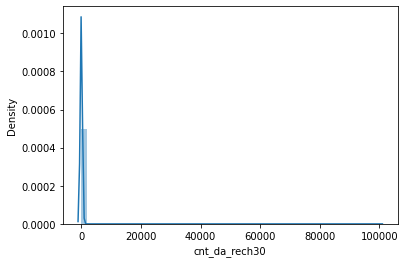

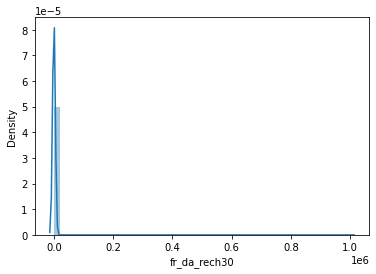

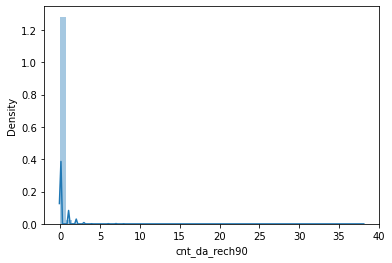

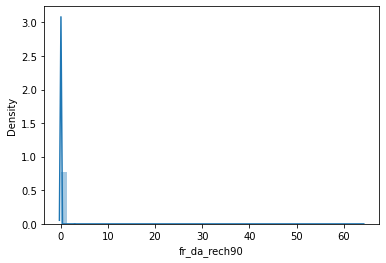

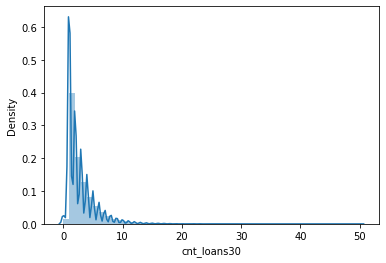

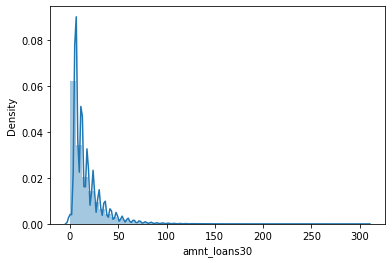

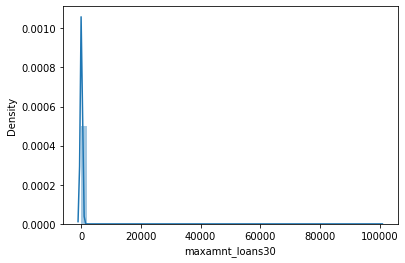

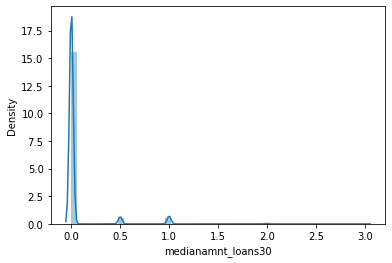

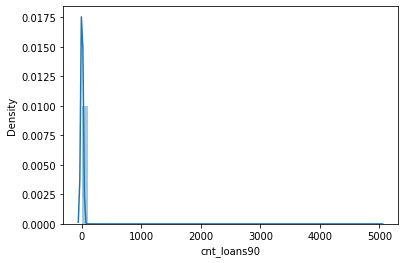

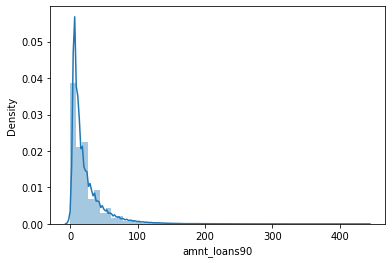

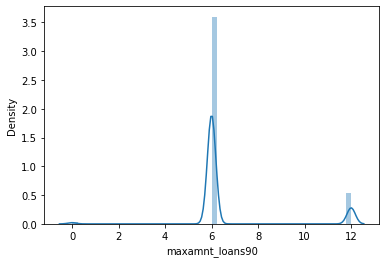

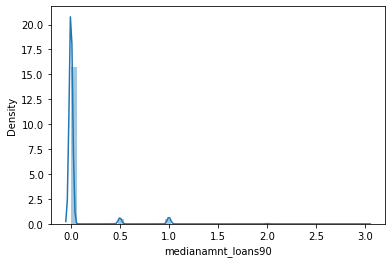

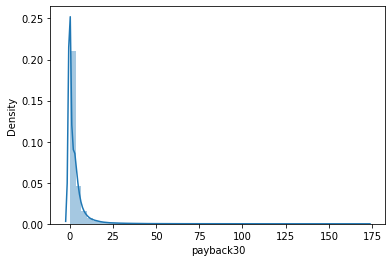

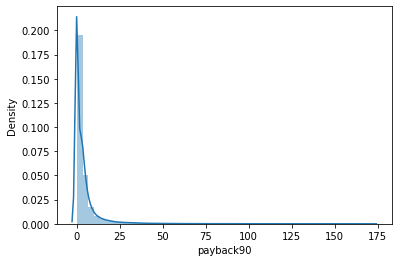

In [ ]:
# Making of distplot to show the skewness in different columns
for g in df.describe().columns:
    sns.distplot(df[g])
    plt.show()

Bivariate analysis

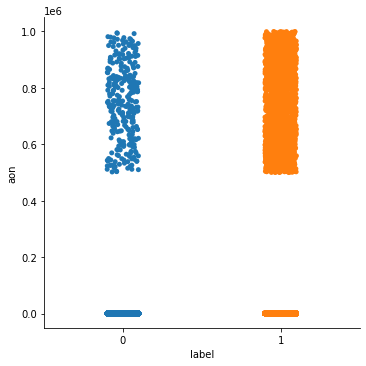

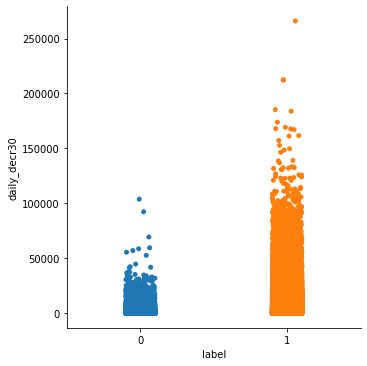

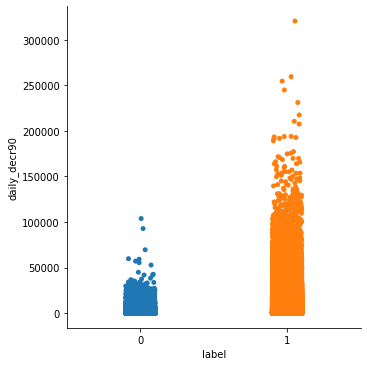

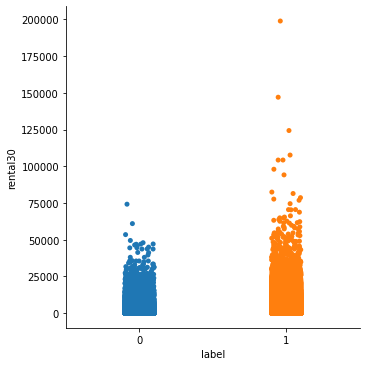

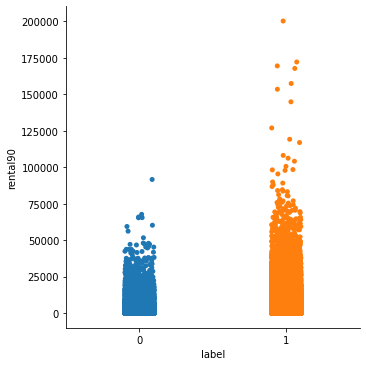

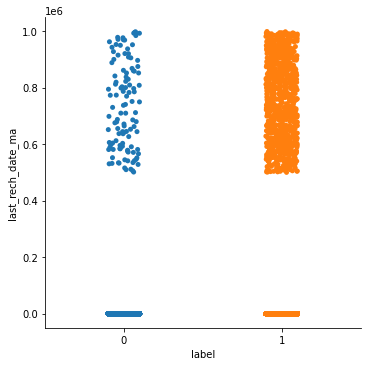

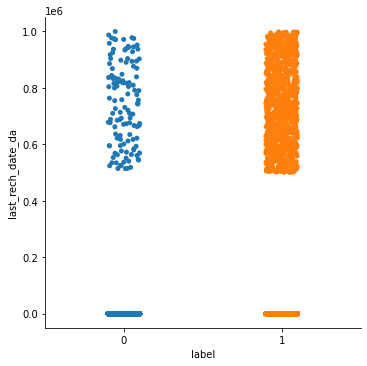

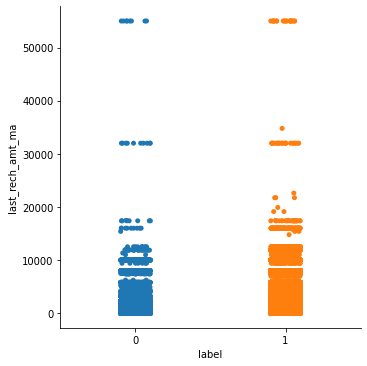

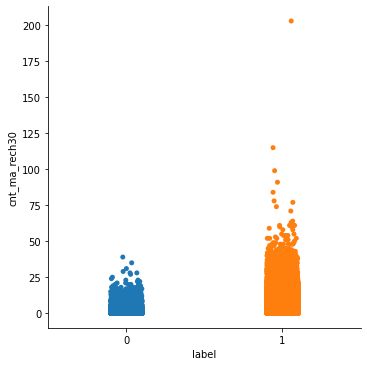

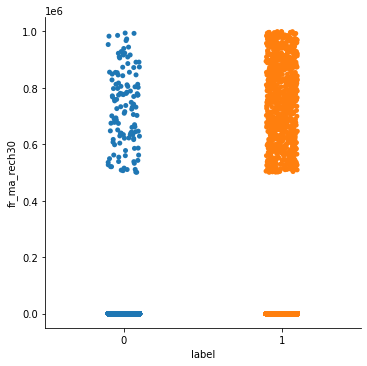

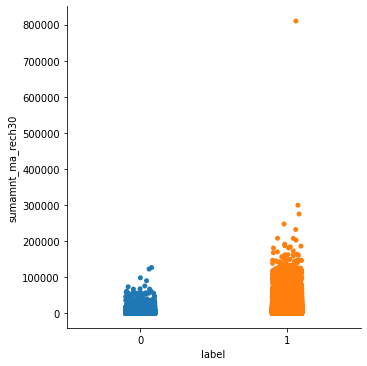

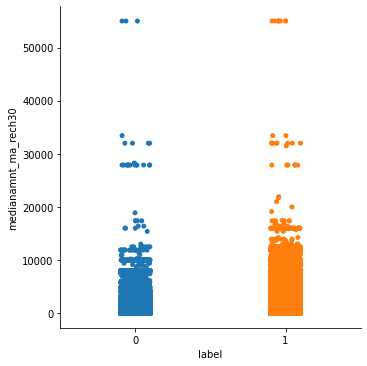

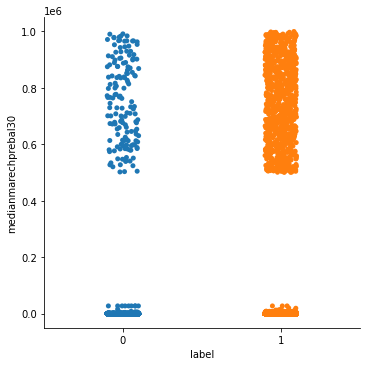

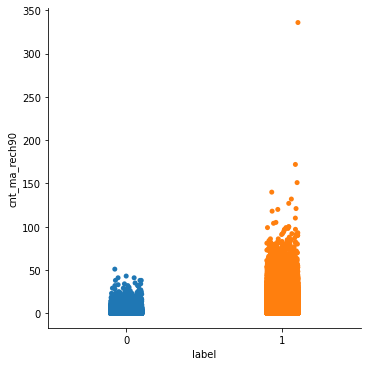

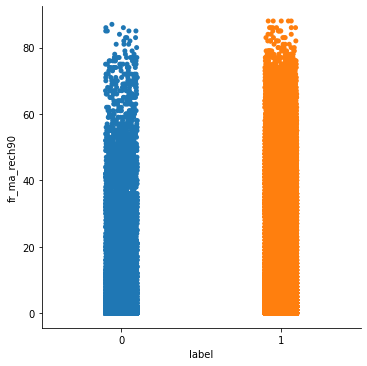

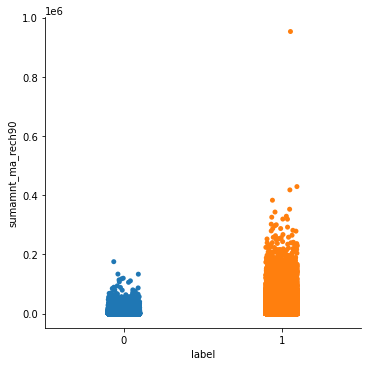

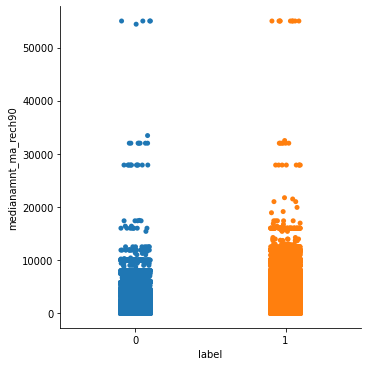

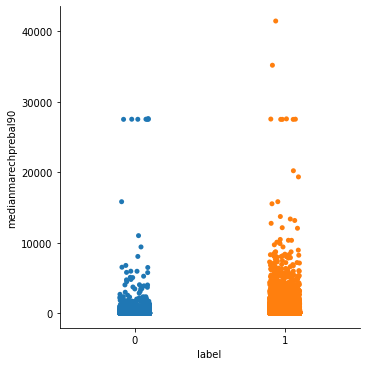

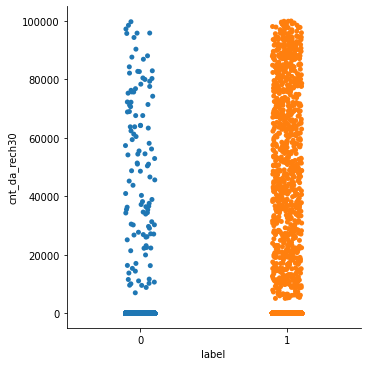

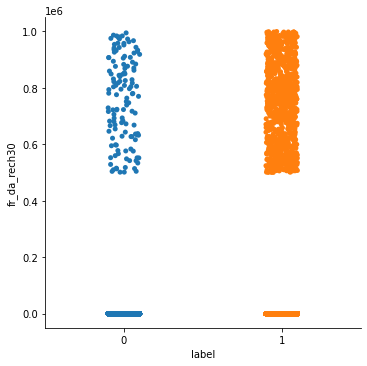

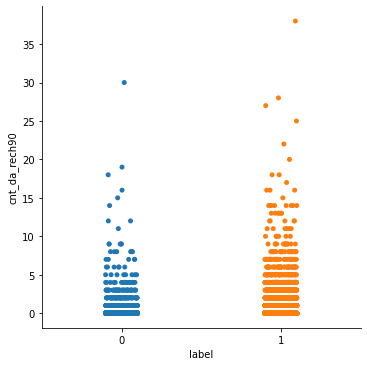

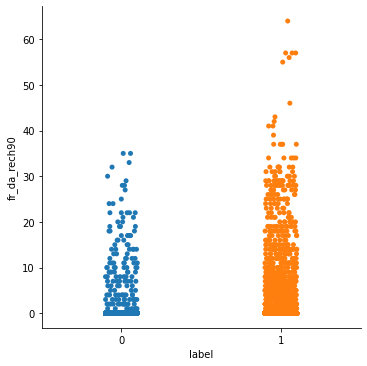

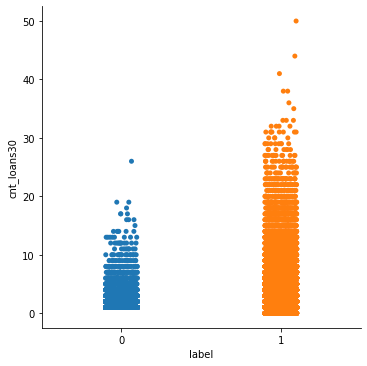

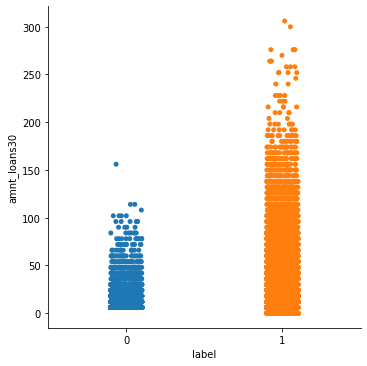

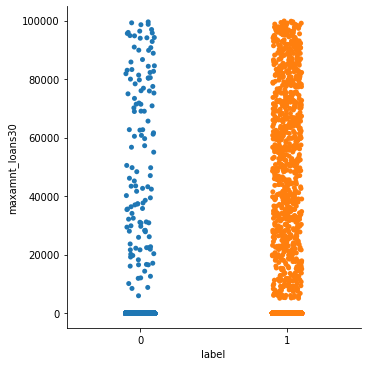

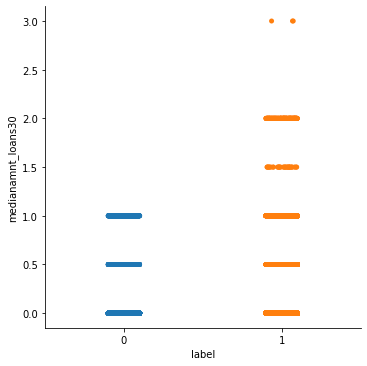

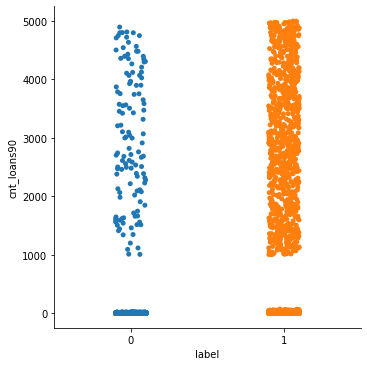

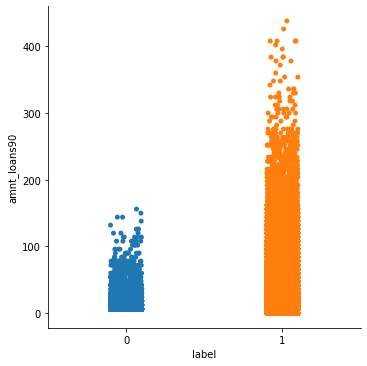

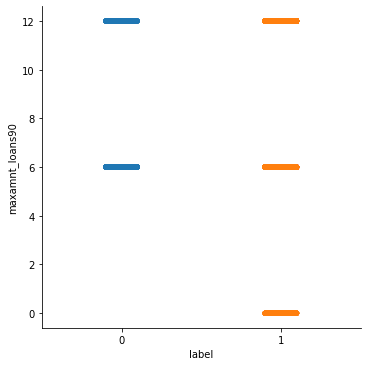

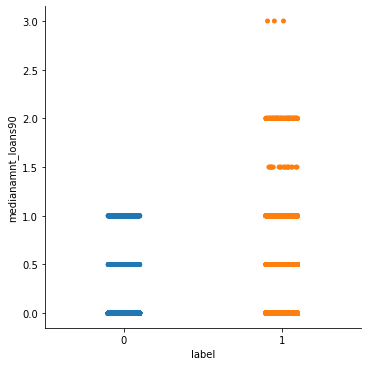

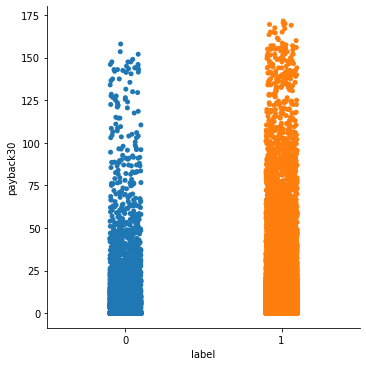

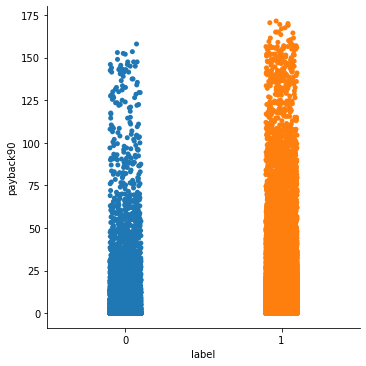

In [ ]:
list=['aon',
'daily_decr30',
'daily_decr90',
'rental30',
'rental90',
'last_rech_date_ma',
'last_rech_date_da',
'last_rech_amt_ma',
'cnt_ma_rech30',
'fr_ma_rech30',
'sumamnt_ma_rech30',
'medianamnt_ma_rech30',
'medianmarechprebal30',
'cnt_ma_rech90',
'fr_ma_rech90',
'sumamnt_ma_rech90',
'medianamnt_ma_rech90',
'medianmarechprebal90',    
'cnt_da_rech30',           
'fr_da_rech30',            
'cnt_da_rech90',
'fr_da_rech90',  
'cnt_loans30',             
'amnt_loans30',            
'maxamnt_loans30',         
'medianamnt_loans30',      
'cnt_loans90',             
'amnt_loans90',            
'maxamnt_loans90',         
'medianamnt_loans90',      
'payback30',               
'payback90']

for i in list:
    sns.catplot(x='label',y=i,data=df)
    plt.show()

Doing Bivariate analysis putting all columns in check with our target variable 'label'.
Checking how the data of the desired column is spread.

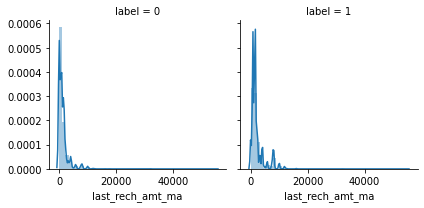

In [ ]:
#Facegrid

face=sns.FacetGrid(df,col='label')
face.map(sns.distplot,'last_rech_amt_ma')
plt.show()

For Amount of last recharge of main account (in Indonesian Rupiah we can see most of the entries  for defaulters,non-defaulters can be see in the rane from -2 to 2

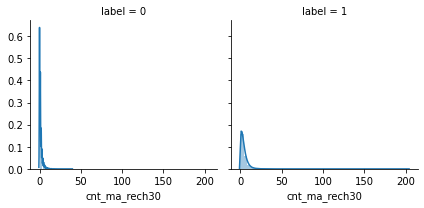

In [ ]:
face=sns.FacetGrid(df,col='label')
face.map(sns.distplot,'cnt_ma_rech30')
plt.show()

For Number of times main account got recharged in last 30 days we observe that our target 'label' lie in the range from -2 to 2.

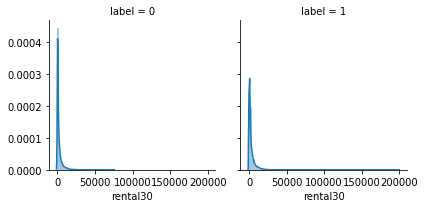

In [ ]:
face=sns.FacetGrid(df,col='label')
face.map(sns.distplot,'rental30')
plt.show()

For Average main account balance over last 30 days we observe that target label lie in the range form -2 to -2.

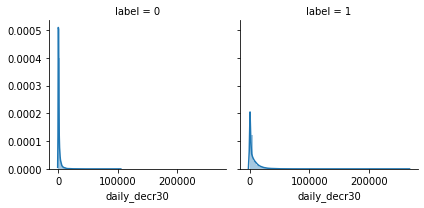

In [ ]:
face=sns.FacetGrid(df,col='label')
face.map(sns.distplot,'daily_decr30')
plt.show()

For Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah) we observe that target "label" lie in the range from -2 to 2. But we also notice that in 15 days interval the daily amount spend is very low.

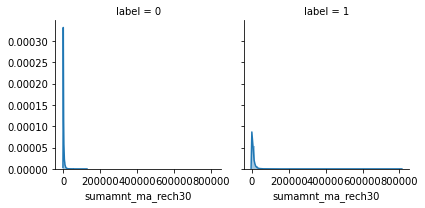

In [ ]:
face=sns.FacetGrid(df,col='label')
face.map(sns.distplot,'sumamnt_ma_rech30')
plt.show()

For Total amount of recharge in main account over last 30 days (in Indonesian Rupiah) we observe in label respect that the range of data lies in -2 to 2.

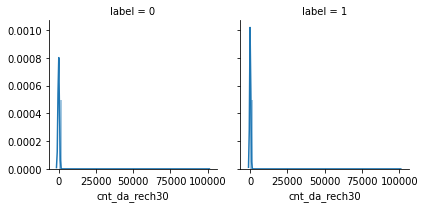

In [ ]:
face=sns.FacetGrid(df,col='label')
face.map(sns.distplot,'cnt_da_rech30')
plt.show()

For Number of times data account got recharged in last 30 days we there is a very minimum usage of data thats why no one recharging for data.

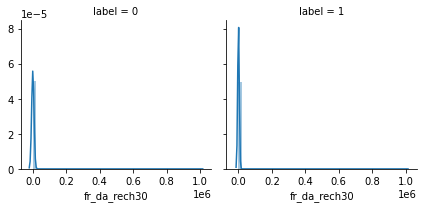

In [ ]:
face=sns.FacetGrid(df,col='label')
face.map(sns.distplot,'fr_da_rech30')
plt.show()

For frequency of data account recharged in last 30 days we see very less recharge for the month by Indonesia People.

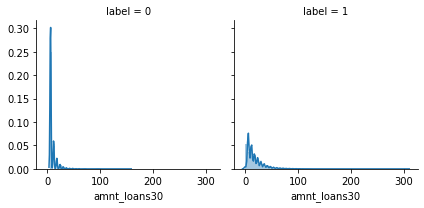

In [ ]:
face=sns.FacetGrid(df,col='label')
face.map(sns.distplot,'amnt_loans30')
plt.show()

For Total amount of loans taken by user in last 30 days we observe that in our target variable'label' for Non-Defaulters the micro credit is been given but in the case where are defaulters we see loan is rarely given to defaulters.

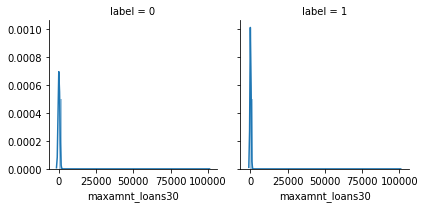

In [ ]:
face=sns.FacetGrid(df,col='label')
face.map(sns.distplot,'maxamnt_loans30')
plt.show()

For maximum amount of loan taken by the user in last 30 days we observe regarding 'label' that non-defaulter are comparatively taking maxmium amount of loan than the defaulters.

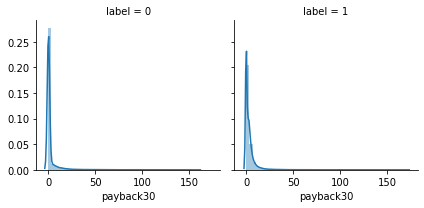

In [ ]:
face=sns.FacetGrid(df,col='label')
face.map(sns.distplot,'payback30')
plt.show()

In 'payback30' Average payback time in days over last 30 days in this we observe regarding our target variable 'label' that the defaulter ones who are mostly not paying it during 30 days and non defaulters are of course paying it on time. 

In [ ]:
# Checking of skewness in the dataset.

df.skew()

label                   -2.270254
aon                     10.392951
daily_decr30             3.946246
daily_decr90             4.252578
rental30                 4.560510
rental90                 4.467282
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779883
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    45.086298
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans9

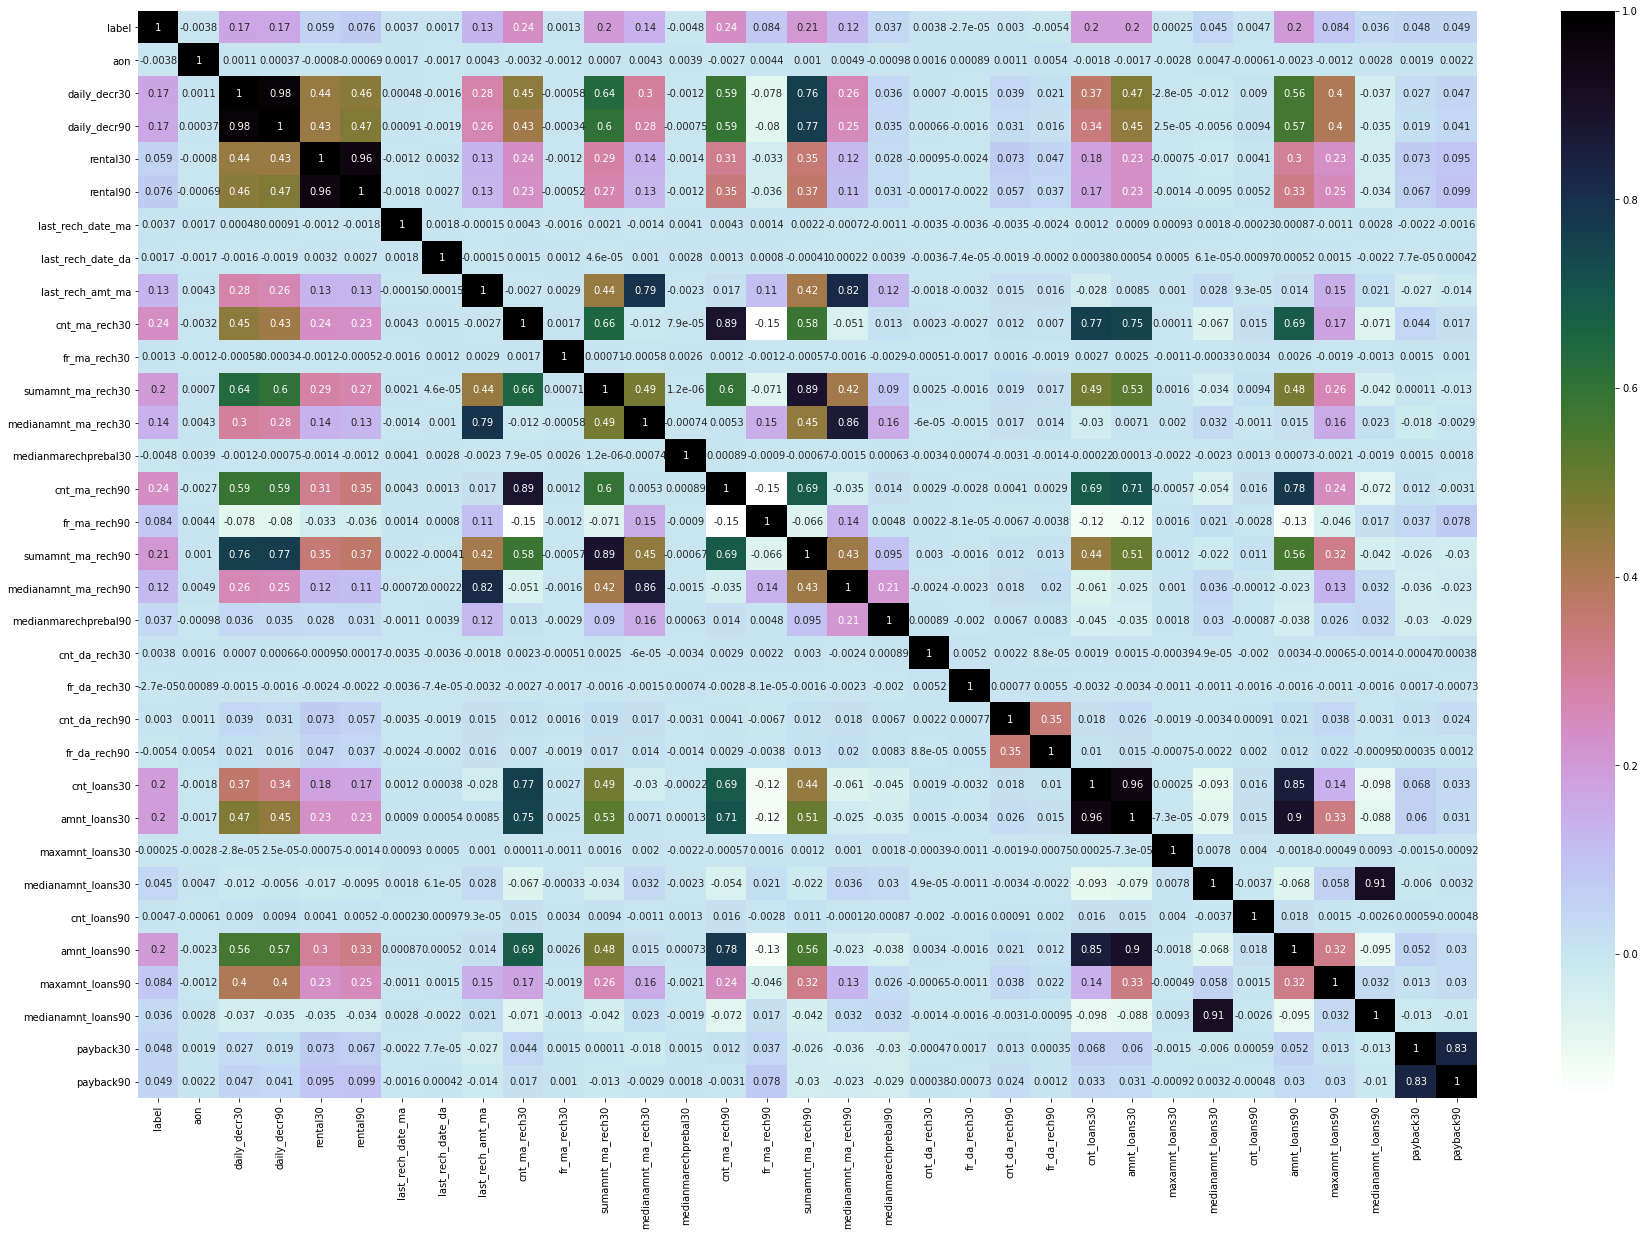

In [ ]:
# Plotting of correlation matrix.

plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r')

 Observations

- rental30 and rental90 are positively correlated with each other.
- delay_decr30 and delay_decr90 are positively correlated with each other.
- cnt_loans30 and amnt_loans30  are positively correlated with each other.
- payback30 and pacback90 are also positively correlated with each other.

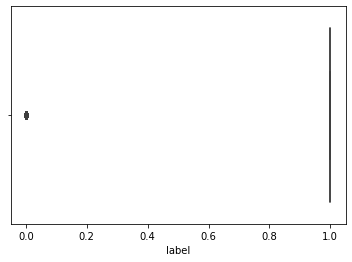

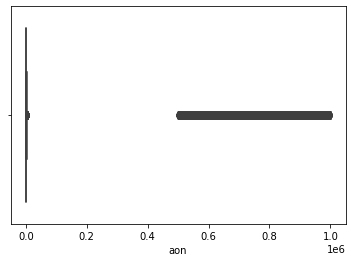

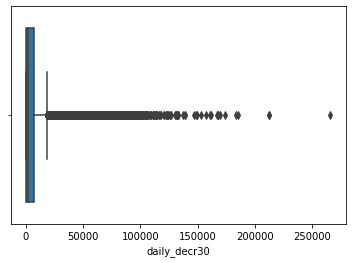

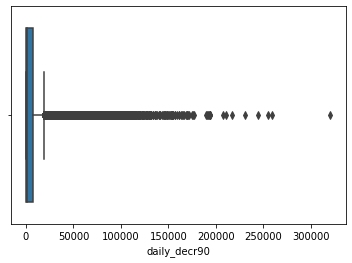

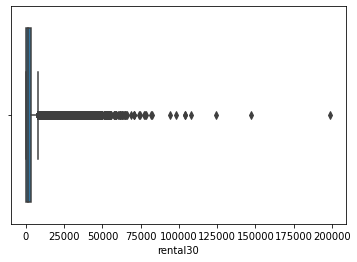

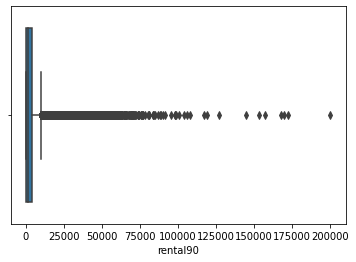

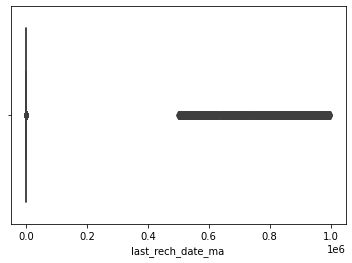

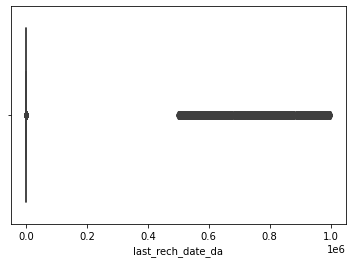

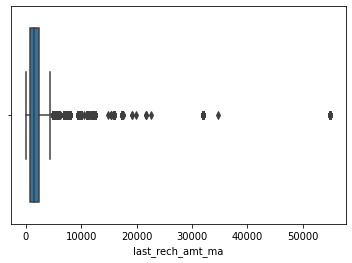

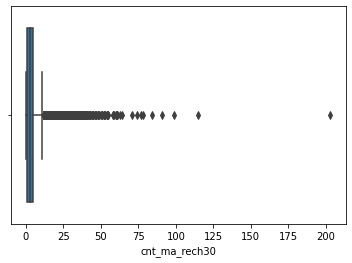

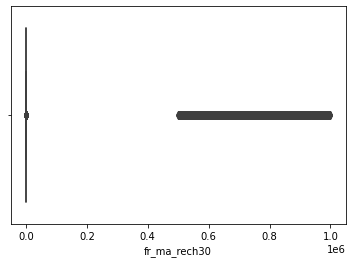

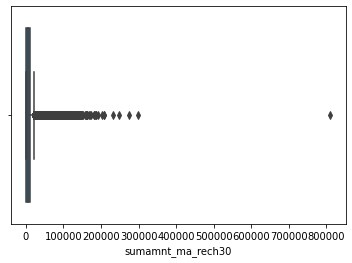

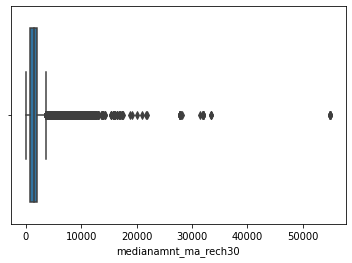

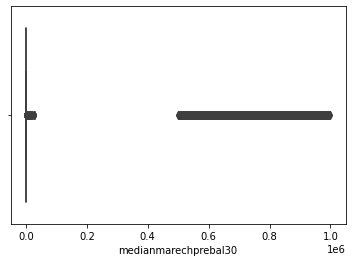

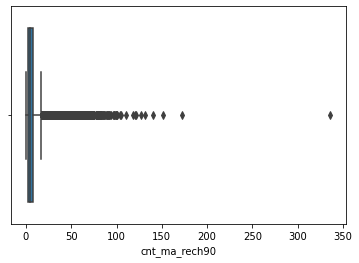

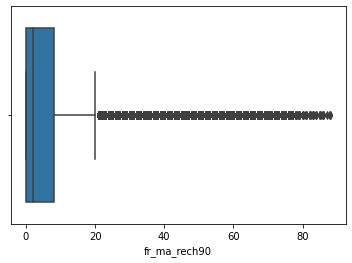

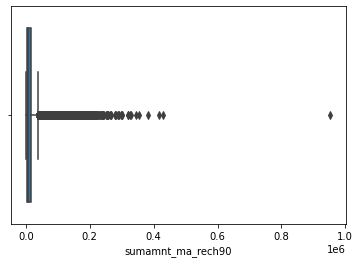

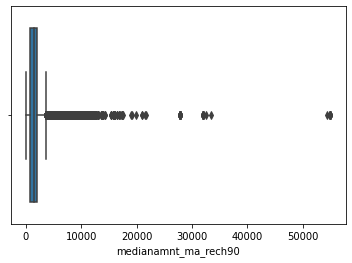

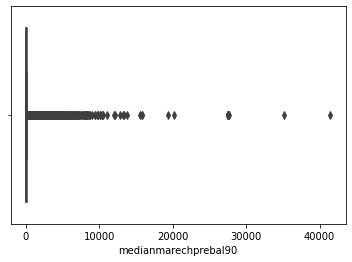

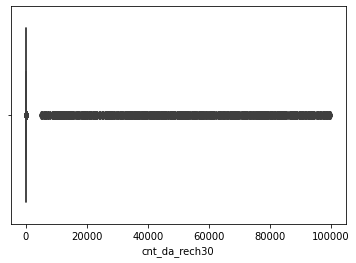

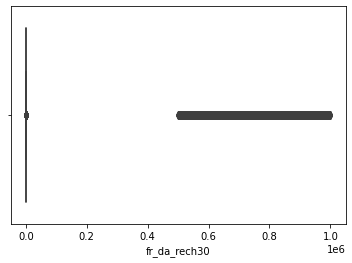

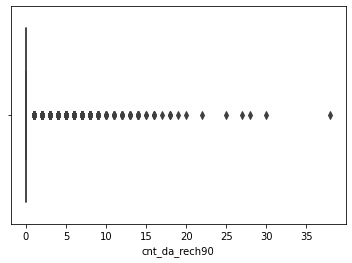

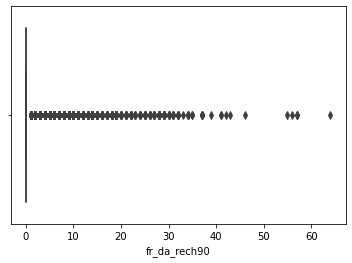

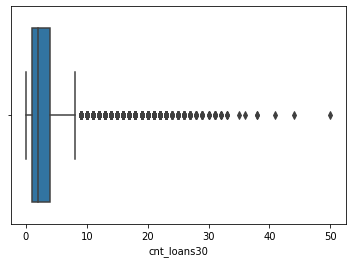

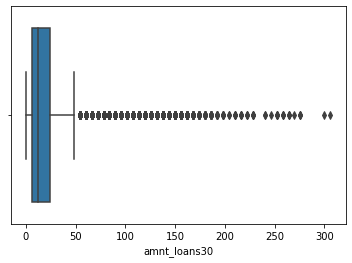

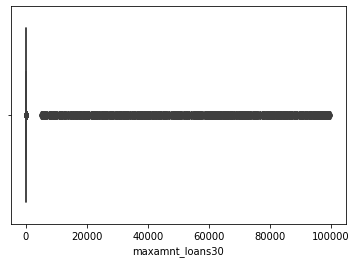

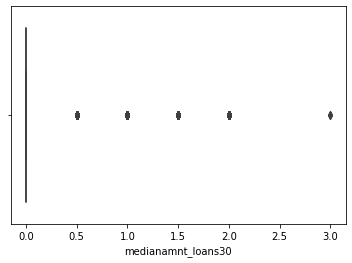

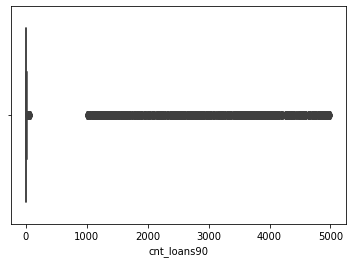

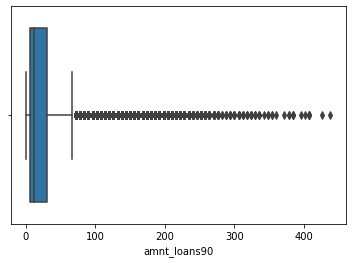

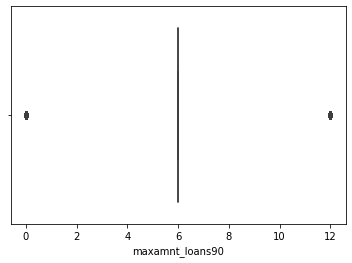

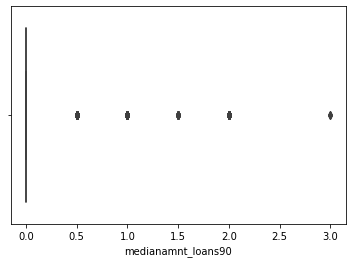

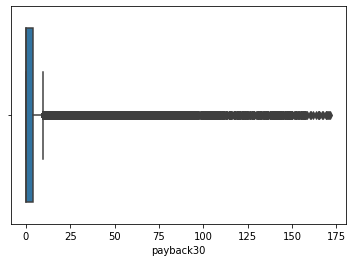

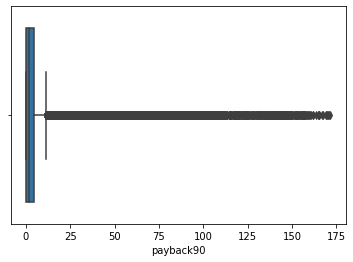

In [ ]:
# Checking for Outliers
for l in df.columns:
    sns.boxplot(df[l])
    plt.show()

Observations:

We find outliers in all the columns in our dataset.

In [ ]:
#Treating of skewness using Powertransform function.

from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')
for i in df.skew().index[1:]:
    if df.skew().loc[i]>0.55:
        df[i]=pt.fit_transform(df[i].values.reshape(-1,1))
    if df.skew().loc[i]<-0.55:
        df[i]=pt.fit_transform(df[i].values.reshape(-1,1))
    else:
        df[i]=df[i]

In [ ]:
df.skew()

label                   -2.270254
aon                     -0.298537
daily_decr30            -0.130636
daily_decr90            -0.120627
rental30                -0.040537
rental90                -0.041327
last_rech_date_ma        0.012083
last_rech_date_da        5.307319
last_rech_amt_ma        -0.061262
cnt_ma_rech30           -0.000145
fr_ma_rech30             0.165015
sumamnt_ma_rech30       -0.291322
medianamnt_ma_rech30    -0.189628
medianmarechprebal30    -0.027935
cnt_ma_rech90           -0.002465
fr_ma_rech90             0.142952
sumamnt_ma_rech90       -0.192158
medianamnt_ma_rech90    -0.044604
medianmarechprebal90     0.014084
cnt_da_rech30            6.925820
fr_da_rech30            11.390665
cnt_da_rech90            6.006577
fr_da_rech90            15.469700
cnt_loans30              0.036243
amnt_loans30             0.001948
maxamnt_loans30          0.545064
medianamnt_loans30       3.447735
cnt_loans90              0.105580
amnt_loans90            -0.008988
maxamnt_loans9

In [ ]:
df

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,-0.510570,0.492214,0.469614,-0.805176,-0.794585,-0.300486,-0.182168,0.083417,-0.275617,1.603299,-0.177906,0.208594,-0.605387,-0.577409,1.335401,-0.440305,0.146193,-0.827161,-0.141497,-0.087125,-0.162110,-0.064375,0.011773,-0.097563,-0.130678,-0.269051,-0.186805,-0.250850,-0.285611,-0.248272,1.813266,1.783964
1,1,0.410198,1.106126,1.059052,0.774494,0.614538,1.424935,-0.182168,1.501277,-0.799355,-1.128949,0.219811,1.632404,0.423996,-1.027906,-1.207069,-0.086685,1.682267,0.363406,-0.141497,-0.087125,-0.162110,-0.064375,-0.913019,-0.097563,1.241244,-0.269051,-1.034294,-0.250850,2.325828,-0.248272,-0.937405,-1.018917
2,1,0.150760,0.179853,0.165292,-0.120256,-0.216868,0.026239,-0.182168,0.083417,-0.799355,-1.128949,-0.535362,0.208594,0.465215,-1.027906,-1.207069,-0.760548,0.146193,0.418352,-0.141497,-0.087125,-0.162110,-0.064375,-0.913019,-0.894782,-0.130678,-0.269051,-1.034294,-1.005714,-0.285611,-0.248272,-0.937405,-1.018917
3,1,-0.636224,-1.124028,-1.121774,-0.937959,-0.989422,1.823795,-0.182168,-0.291052,-1.694157,-1.128949,-1.902189,-1.961729,-1.772127,-1.027906,-1.207069,-0.949332,-0.253806,-1.277328,-0.141497,-0.087125,-0.162110,-0.064375,0.011773,-0.097563,-0.130678,-0.269051,-0.186805,-0.250850,-0.285611,-0.248272,-0.937405,-1.018917
4,1,0.657942,-0.586130,-0.585941,-0.007664,-0.111533,0.259912,-0.182168,0.449550,0.992270,0.188872,1.262660,0.575164,0.053613,0.657800,-0.060965,0.974121,0.783547,0.010087,-0.141497,-0.087125,-0.162110,-0.064375,1.570451,1.454951,-0.130678,-0.269051,1.180312,1.097886,-0.285611,-0.248272,0.639236,0.431438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,-0.115528,-0.583595,-0.583434,-0.012763,-0.116298,-0.814667,-0.182168,1.051183,0.096120,0.188872,0.664001,0.903883,0.626447,-0.256024,-0.060965,0.305507,0.894046,0.639397,-0.141497,-0.087125,-0.162110,-0.064375,0.011773,-0.097563,-0.130678,-0.269051,-0.186805,-0.250850,-0.285611,-0.248272,0.094998,-0.098305
209589,1,0.764602,-0.984481,-0.982011,0.264092,0.141814,0.259912,-0.182168,-0.429509,0.384542,-0.239912,-0.175310,-0.303313,0.904026,0.373347,-0.060965,-0.296176,-0.400935,0.777693,-0.141497,-0.087125,-0.162110,-0.064375,0.556347,0.393236,-0.130678,-0.269051,0.300689,0.192260,-0.285611,-0.248272,0.094998,-0.098305
209590,1,0.714884,1.095040,1.050685,1.123108,1.247768,0.026239,-0.182168,0.083417,0.620252,1.087596,0.575767,0.208594,0.335887,0.984805,0.509415,0.765499,0.146193,0.195862,-0.141497,-0.087125,-0.162110,-0.064375,0.924658,1.454951,1.241244,-0.269051,1.038116,1.358455,2.325828,-0.248272,0.974292,0.752939
209591,1,1.147613,1.120340,1.075701,-0.522908,-0.169986,-0.300486,5.490532,-0.429509,0.620252,0.649604,0.795555,-0.303313,0.912162,0.373347,0.369295,0.734963,0.585178,0.698975,-0.141497,-0.087125,6.168644,-0.064375,0.011773,0.393236,1.241244,-0.269051,0.300689,0.503740,2.325828,-0.248272,-0.937405,1.337831


In [ ]:
#Removing of outliers using Zscore.

z=np.abs(zscore(df))
threshold=3
micro=df[(z<3).all(axis=1)]
micro

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,-0.510570,0.492214,0.469614,-0.805176,-0.794585,-0.300486,-0.182168,0.083417,-0.275617,1.603299,-0.177906,0.208594,-0.605387,-0.577409,1.335401,-0.440305,0.146193,-0.827161,-0.141497,-0.087125,-0.16211,-0.064375,0.011773,-0.097563,-0.130678,-0.269051,-0.186805,-0.250850,-0.285611,-0.248272,1.813266,1.783964
1,1,0.410198,1.106126,1.059052,0.774494,0.614538,1.424935,-0.182168,1.501277,-0.799355,-1.128949,0.219811,1.632404,0.423996,-1.027906,-1.207069,-0.086685,1.682267,0.363406,-0.141497,-0.087125,-0.16211,-0.064375,-0.913019,-0.097563,1.241244,-0.269051,-1.034294,-0.250850,2.325828,-0.248272,-0.937405,-1.018917
2,1,0.150760,0.179853,0.165292,-0.120256,-0.216868,0.026239,-0.182168,0.083417,-0.799355,-1.128949,-0.535362,0.208594,0.465215,-1.027906,-1.207069,-0.760548,0.146193,0.418352,-0.141497,-0.087125,-0.16211,-0.064375,-0.913019,-0.894782,-0.130678,-0.269051,-1.034294,-1.005714,-0.285611,-0.248272,-0.937405,-1.018917
3,1,-0.636224,-1.124028,-1.121774,-0.937959,-0.989422,1.823795,-0.182168,-0.291052,-1.694157,-1.128949,-1.902189,-1.961729,-1.772127,-1.027906,-1.207069,-0.949332,-0.253806,-1.277328,-0.141497,-0.087125,-0.16211,-0.064375,0.011773,-0.097563,-0.130678,-0.269051,-0.186805,-0.250850,-0.285611,-0.248272,-0.937405,-1.018917
4,1,0.657942,-0.586130,-0.585941,-0.007664,-0.111533,0.259912,-0.182168,0.449550,0.992270,0.188872,1.262660,0.575164,0.053613,0.657800,-0.060965,0.974121,0.783547,0.010087,-0.141497,-0.087125,-0.16211,-0.064375,1.570451,1.454951,-0.130678,-0.269051,1.180312,1.097886,-0.285611,-0.248272,0.639236,0.431438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209586,1,-0.581385,1.352936,1.298301,0.833466,0.846126,-0.300486,-0.182168,0.083417,1.280909,0.649604,1.115125,0.212950,0.174851,1.448219,-0.060965,1.325259,0.150862,0.044211,-0.141497,-0.087125,-0.16211,-0.064375,1.403174,2.034549,1.241244,-0.269051,1.759898,2.156675,2.325828,-0.248272,0.799201,0.449831
209588,1,-0.115528,-0.583595,-0.583434,-0.012763,-0.116298,-0.814667,-0.182168,1.051183,0.096120,0.188872,0.664001,0.903883,0.626447,-0.256024,-0.060965,0.305507,0.894046,0.639397,-0.141497,-0.087125,-0.16211,-0.064375,0.011773,-0.097563,-0.130678,-0.269051,-0.186805,-0.250850,-0.285611,-0.248272,0.094998,-0.098305
209589,1,0.764602,-0.984481,-0.982011,0.264092,0.141814,0.259912,-0.182168,-0.429509,0.384542,-0.239912,-0.175310,-0.303313,0.904026,0.373347,-0.060965,-0.296176,-0.400935,0.777693,-0.141497,-0.087125,-0.16211,-0.064375,0.556347,0.393236,-0.130678,-0.269051,0.300689,0.192260,-0.285611,-0.248272,0.094998,-0.098305
209590,1,0.714884,1.095040,1.050685,1.123108,1.247768,0.026239,-0.182168,0.083417,0.620252,1.087596,0.575767,0.208594,0.335887,0.984805,0.509415,0.765499,0.146193,0.195862,-0.141497,-0.087125,-0.16211,-0.064375,0.924658,1.454951,1.241244,-0.269051,1.038116,1.358455,2.325828,-0.248272,0.974292,0.752939


In [ ]:
# Checking the shape of data we have before treating and after treating of outliers.
print('before removing outliers shape was:', df.shape, '\n', 'after removing outliers shape is: ',micro.shape)
print('▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣')

before removing outliers shape was: (209593, 33) 
 after removing outliers shape is:  (176883, 33)
▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣


In [ ]:
# Checking for total defaulters as it is imbalanced data.

defaulter=micro[micro['label']==0]
non_defaulter=micro[micro['label']==1]

In [ ]:
defaulter.shape

(23322, 33)

In [ ]:
non_defaulter.shape

(153561, 33)

In [ ]:
# Splitting the data into x and y for train test split.

x=micro.drop(['label'],axis=1)
x

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,-0.510570,0.492214,0.469614,-0.805176,-0.794585,-0.300486,-0.182168,0.083417,-0.275617,1.603299,-0.177906,0.208594,-0.605387,-0.577409,1.335401,-0.440305,0.146193,-0.827161,-0.141497,-0.087125,-0.16211,-0.064375,0.011773,-0.097563,-0.130678,-0.269051,-0.186805,-0.250850,-0.285611,-0.248272,1.813266,1.783964
1,0.410198,1.106126,1.059052,0.774494,0.614538,1.424935,-0.182168,1.501277,-0.799355,-1.128949,0.219811,1.632404,0.423996,-1.027906,-1.207069,-0.086685,1.682267,0.363406,-0.141497,-0.087125,-0.16211,-0.064375,-0.913019,-0.097563,1.241244,-0.269051,-1.034294,-0.250850,2.325828,-0.248272,-0.937405,-1.018917
2,0.150760,0.179853,0.165292,-0.120256,-0.216868,0.026239,-0.182168,0.083417,-0.799355,-1.128949,-0.535362,0.208594,0.465215,-1.027906,-1.207069,-0.760548,0.146193,0.418352,-0.141497,-0.087125,-0.16211,-0.064375,-0.913019,-0.894782,-0.130678,-0.269051,-1.034294,-1.005714,-0.285611,-0.248272,-0.937405,-1.018917
3,-0.636224,-1.124028,-1.121774,-0.937959,-0.989422,1.823795,-0.182168,-0.291052,-1.694157,-1.128949,-1.902189,-1.961729,-1.772127,-1.027906,-1.207069,-0.949332,-0.253806,-1.277328,-0.141497,-0.087125,-0.16211,-0.064375,0.011773,-0.097563,-0.130678,-0.269051,-0.186805,-0.250850,-0.285611,-0.248272,-0.937405,-1.018917
4,0.657942,-0.586130,-0.585941,-0.007664,-0.111533,0.259912,-0.182168,0.449550,0.992270,0.188872,1.262660,0.575164,0.053613,0.657800,-0.060965,0.974121,0.783547,0.010087,-0.141497,-0.087125,-0.16211,-0.064375,1.570451,1.454951,-0.130678,-0.269051,1.180312,1.097886,-0.285611,-0.248272,0.639236,0.431438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209586,-0.581385,1.352936,1.298301,0.833466,0.846126,-0.300486,-0.182168,0.083417,1.280909,0.649604,1.115125,0.212950,0.174851,1.448219,-0.060965,1.325259,0.150862,0.044211,-0.141497,-0.087125,-0.16211,-0.064375,1.403174,2.034549,1.241244,-0.269051,1.759898,2.156675,2.325828,-0.248272,0.799201,0.449831
209588,-0.115528,-0.583595,-0.583434,-0.012763,-0.116298,-0.814667,-0.182168,1.051183,0.096120,0.188872,0.664001,0.903883,0.626447,-0.256024,-0.060965,0.305507,0.894046,0.639397,-0.141497,-0.087125,-0.16211,-0.064375,0.011773,-0.097563,-0.130678,-0.269051,-0.186805,-0.250850,-0.285611,-0.248272,0.094998,-0.098305
209589,0.764602,-0.984481,-0.982011,0.264092,0.141814,0.259912,-0.182168,-0.429509,0.384542,-0.239912,-0.175310,-0.303313,0.904026,0.373347,-0.060965,-0.296176,-0.400935,0.777693,-0.141497,-0.087125,-0.16211,-0.064375,0.556347,0.393236,-0.130678,-0.269051,0.300689,0.192260,-0.285611,-0.248272,0.094998,-0.098305
209590,0.714884,1.095040,1.050685,1.123108,1.247768,0.026239,-0.182168,0.083417,0.620252,1.087596,0.575767,0.208594,0.335887,0.984805,0.509415,0.765499,0.146193,0.195862,-0.141497,-0.087125,-0.16211,-0.064375,0.924658,1.454951,1.241244,-0.269051,1.038116,1.358455,2.325828,-0.248272,0.974292,0.752939


In [ ]:
y=micro['label']
y

0         0
1         1
2         1
3         1
4         1
         ..
209586    1
209588    1
209589    1
209590    1
209592    1
Name: label, Length: 176883, dtype: int64

In [ ]:
# Scaling the data using MinMaxScaler.
mnm=MinMaxScaler()
micro=mnm.fit_transform(x)
x=pd.DataFrame(micro,columns=x.columns)
x

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0.562149,0.528429,0.522804,0.275753,0.280863,0.378501,0.0,0.430555,0.303833,0.664758,0.351738,0.437714,0.255662,0.253989,0.802911,0.315427,0.445333,0.209297,0.0,0.0,0.0,0.0,0.265182,0.205054,0.0,0.0,0.218509,0.188656,0.0,0.0,0.899577,0.855351
1,0.772521,0.669840,0.658010,0.576460,0.548383,0.796635,0.0,0.708143,0.191655,0.000000,0.432869,0.724870,0.481226,0.159737,0.000000,0.385813,0.745221,0.455325,0.0,0.0,0.0,0.0,0.000000,0.205054,1.0,0.0,0.000000,0.188656,1.0,0.0,0.000000,0.000000
2,0.713246,0.456478,0.452999,0.406135,0.390542,0.457679,0.0,0.430555,0.191655,0.000000,0.278820,0.437714,0.490258,0.159737,0.000000,0.251685,0.445333,0.466679,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
3,0.533440,0.156135,0.157770,0.250476,0.243874,0.893293,0.0,0.357242,0.000000,0.000000,0.000000,0.000000,0.000000,0.159737,0.000000,0.214108,0.367241,0.116272,0.0,0.0,0.0,0.0,0.265182,0.205054,0.0,0.0,0.218509,0.188656,0.0,0.0,0.000000,0.000000
4,0.829125,0.280037,0.280680,0.427568,0.410540,0.514306,0.0,0.502236,0.575397,0.320627,0.645600,0.511645,0.400066,0.512420,0.361939,0.596960,0.569763,0.382312,0.0,0.0,0.0,0.0,0.712129,0.604379,0.0,0.0,0.570995,0.525733,0.0,0.0,0.515623,0.442603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176878,0.545969,0.726692,0.712890,0.587686,0.592350,0.378501,0.0,0.430555,0.637220,0.432723,0.615505,0.438593,0.426632,0.677791,0.361939,0.666852,0.446244,0.389364,0.0,0.0,0.0,0.0,0.664163,0.753458,1.0,0.0,0.720431,0.790346,1.0,0.0,0.567938,0.448216
176879,0.652406,0.280621,0.281255,0.426597,0.409635,0.253896,0.0,0.620024,0.383454,0.320627,0.523480,0.577941,0.525588,0.321230,0.361939,0.463876,0.591336,0.512357,0.0,0.0,0.0,0.0,0.265182,0.205054,0.0,0.0,0.218509,0.188656,0.0,0.0,0.337636,0.280942
176880,0.853494,0.188279,0.189829,0.479300,0.458637,0.514306,0.0,0.330135,0.445230,0.216303,0.352268,0.334472,0.586413,0.452906,0.361939,0.344115,0.338516,0.540936,0.0,0.0,0.0,0.0,0.421337,0.331293,0.0,0.0,0.344201,0.299398,0.0,0.0,0.337636,0.280942
176881,0.842135,0.667287,0.656091,0.642823,0.668601,0.457679,0.0,0.430555,0.495716,0.539287,0.505481,0.437714,0.461919,0.580835,0.542065,0.555435,0.445333,0.420702,0.0,0.0,0.0,0.0,0.526950,0.604379,1.0,0.0,0.534332,0.590854,1.0,0.0,0.625200,0.540715


Using SMOTE for handling imbalanced data which uses under sampling method tomek with an over sampling method SMOTE to handle imbalanced data.

In [ ]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
X_res,y_res = SM.fit_resample(x,y)

In [ ]:
X_res.shape

(307122, 32)

In [ ]:
y_res.shape

(307122,)

In [ ]:
from sklearn.model_selection import train_test_split  # Import "train_test_split" method

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
# Parameters:
# test_size : It decides how many test data in percentage.
# random_state : This parameter can take any value. This value decides randomness seed.

In [ ]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [ ]:
#Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
classifier.fit(X_res, y_res)
features_label = df.columns
importances = classifier.feature_importances_
indices = np. argsort(importances)[::-1]
for i in range(X_res.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i],importances[indices[i]]))

 1) label                          0.089651
 2) aon                            0.081011
 3) daily_decr30                   0.077157
 4) daily_decr90                   0.072144
 5) rental30                       0.064482
 6) rental90                       0.058304
 7) last_rech_date_ma              0.052982
 8) last_rech_date_da              0.048742
 9) last_rech_amt_ma               0.048689
10) cnt_ma_rech30                  0.048271
11) fr_ma_rech30                   0.038611
12) sumamnt_ma_rech30              0.032755
13) medianamnt_ma_rech30           0.032598
14) medianmarechprebal30           0.032110
15) cnt_ma_rech90                  0.031886
16) fr_ma_rech90                   0.031216
17) sumamnt_ma_rech90              0.029102
18) medianamnt_ma_rech90           0.026372
19) medianmarechprebal90           0.024891
20) cnt_da_rech30                  0.022890
21) fr_da_rech30                   0.019449
22) cnt_da_rech90                  0.017639
23) fr_da_rech90                

# Feature Importance

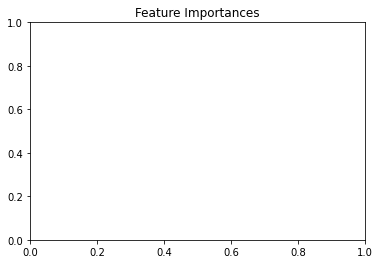

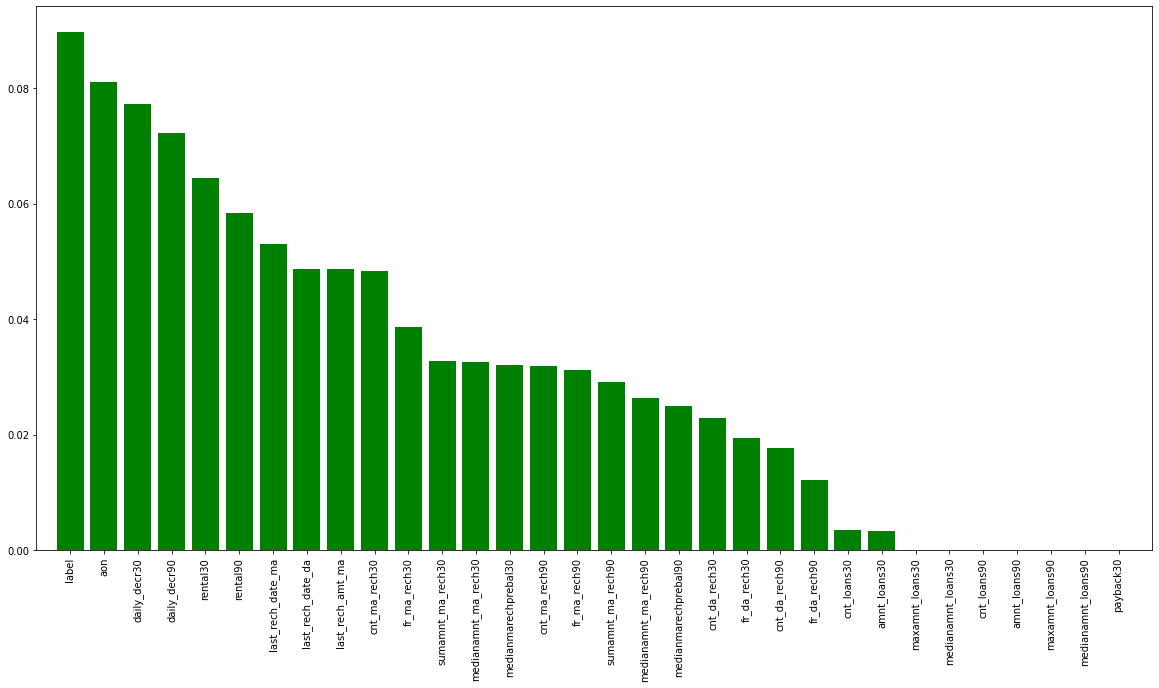

In [ ]:
plt.title('Feature Importances')
plt.figure(figsize=(20,10))
plt.bar(range(X_res.shape[1]),importances[indices], color="green", align="center")
plt.xticks(range(X_res.shape[1]),features_label, rotation=90)
plt.xlim([-1, X_res.shape[1]])
plt.show()

# Classification Methods

1.Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#Predicting and estimating the result

y_pred_dt = dt.predict(X_test)
print("Decision Tree Classifier report: \n\n", DecisionTreeClassifier(y_test, y_pred_dt))
print("Test Accuracy: {}%".format(round(dt.score(X_test, y_test)*100, 2)))

Decision Tree Classifier report: 

 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                       criterion=array([0, 0, 0, ..., 0, 1, 1]), max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None,
                       splitter=array([0, 0, 0, ..., 0, 1, 1]))
Test Accuracy: 88.84%


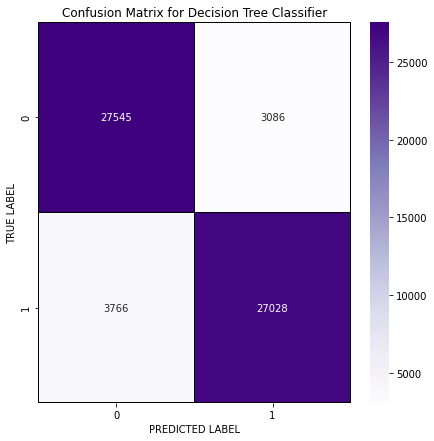

In [ ]:
#Confusion Matrix for Decision Tree Classifier
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_dt)
x_axis_labels = ["Not-Good(0)","Good(1)"]
y_axis_labels = ["Not-Good(0)","Good(1)"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples") #xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
#plt.savefig("dtcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

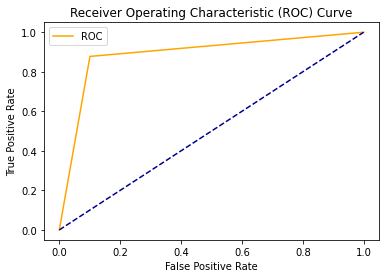

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)
plot_roc_curve(fpr, tpr)

# 2.Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="lbfgs", max_iter=500)
lr.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(lr.score(X_test, y_test)*100,2)))

Test Accuracy: 77.36%


In [ ]:
#Classification report of Logistic Regression Classifier

y_pred_lr = lr.predict(X_test)
print("Logistic Regression Classifier report: \n\n", LogisticRegression(y_test, y_pred_lr))

Logistic Regression Classifier report: 

 LogisticRegression(C=1.0, class_weight=None,
                   dual=array([0, 0, 0, ..., 0, 1, 1]), fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None,
                   penalty=array([0, 0, 0, ..., 0, 1, 1]), random_state=None,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)


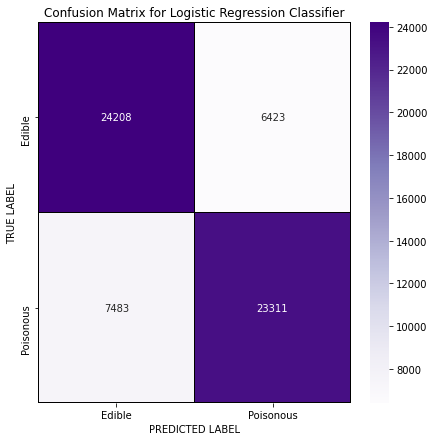

In [ ]:
#Confusion Matrix for Logistic Regression Classifier

cm = confusion_matrix(y_test, y_pred_lr)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.5, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
#plt.savefig("lrcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

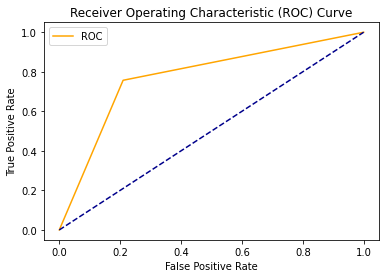

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr)
plot_roc_curve(fpr, tpr)

# 3.Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(rfc.score(X_test, y_test)*100, 2)))

Test Accuracy: 94.19%


In [ ]:
#Classification report of Random Forest Classifier

y_pred_rfc =rfc.predict(X_test)
print("Random Forest Classifier report: \n\n", RandomForestClassifier(y_test, y_pred_rfc))

Random Forest Classifier report: 

 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion=array([0, 0, 0, ..., 0, 1, 1]), max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=array([0, 0, 0, ..., 0, 1, 1]), n_jobs=None,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)


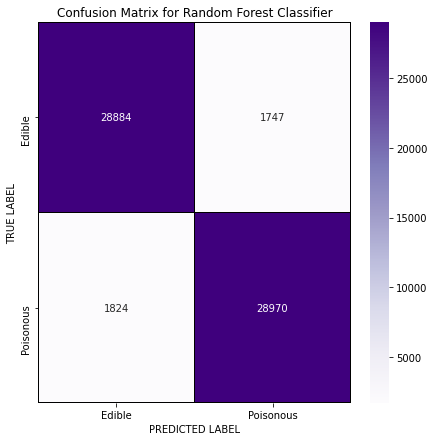

In [ ]:
#Confusion matrix for Random Forest Classifier

cm = confusion_matrix(y_test, y_pred_rfc)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier');
#plt.savefig("rfcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

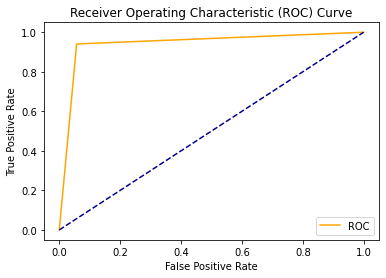

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rfc)
plot_roc_curve(fpr, tpr)

# 4.Naive Byes Classification

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(nb.score(X_test, y_test)*100, 2)))

Test Accuracy: 75.27%


In [ ]:
#Classification report of Naive Bayes Classifier

y_pred_nb = nb.predict(X_test)
print("Naive Bayes Classifier report: \n\n", GaussianNB(y_test, y_pred_nb))

Naive Bayes Classifier report: 

 GaussianNB(priors=array([0, 0, 0, ..., 0, 1, 1]),
           var_smoothing=array([0, 0, 0, ..., 0, 1, 1]))


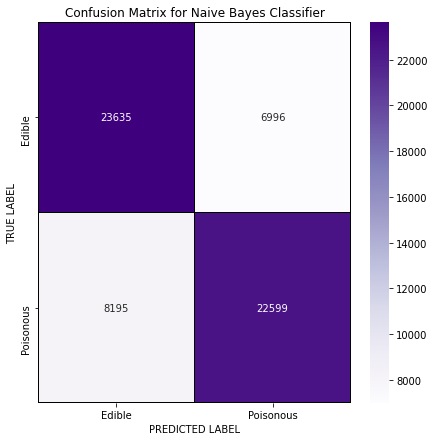

In [ ]:
#Confusion Matrix for Naive Bayes Classifier

cm = confusion_matrix(y_test, y_pred_nb)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Naive Bayes Classifier')
#plt.savefig("nbcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

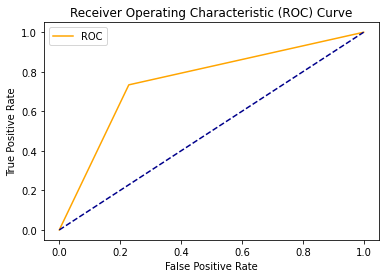

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_nb)
plot_roc_curve(fpr, tpr)

# **Computing Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
print("Decision Tree Classifier :",cross_val_score(dt,X_res,y_res,cv=5).mean())

Decision Tree Classifier : 0.886677119972249


In [ ]:
print("Logistic Regression :",cross_val_score(lr,X_res,y_res,cv=5).mean())

Logistic Regression : 0.7741223413114531


In [71]:
print("Random Forest Classifier",cross_val_score(rfc,X_res,y_res,cv=5).mean())

Random Forest Classifier 0.9384253067849058


In [72]:
print("GaussianNB Classifier",cross_val_score(nb,X_res,y_res,cv=5).mean())

GaussianNB Classifier 0.7537884028843914


# **Hyper parameter tuning**

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
parameter={'max_depth':np.arange(2,10),
            'criterion':['gini','entropy']}

In [75]:
GCV=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [76]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [77]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 9}

In [78]:
Final_mod = RandomForestClassifier(criterion='entropy',max_depth=4)
Final_mod.fit(X_train,y_train)
pred=Final_mod.predict(X_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

78.71225071225071


**Prediction**

In [79]:
# Printing predicted values
test=pd.DataFrame(data=y_test,)
test['Predicted values']=y_pred_rfc
test
# On the lest side values are those which are taken by machine for test...

,0,Predicted values
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
61420,0,0
61421,1,1
61422,0,0
61423,1,1


**Saving** **Final** **Model**

In [80]:
# Saving the Predicted values in csv file
test.to_csv('Micro_credit_Predict.csv')

In [81]:
# Dumping Data in pickle file.
import joblib
joblib.dump(rfc,'Micro_credit_Predict.pkl')

['Micro_credit_Predict.pkl']

# **Conclusion**

1) 28% of Users having negative or zero balance are defaulters, which is very high.

2) 10% to 12% Users are defaulters which falls in the category of Average and Low balance category.

3) Users having high balance and are defaulters are very less in number.

4) Users who take more number of loans are non defaulters(i.e 98% of the category) as they repays the loan within the given time i.e 5 days.

5) 14% of the Users are are among the average number of loan taken category are defaulters.

6) 40 % of the Users who do not even recharged in the 90 days are defaulters only.

7) Users who do very high amount of recharge always pays their loans on time. i.e 98% of them are non-defaulters.

8) 34% of the Users who do less amount of recharge are defaulters.

9) Users who did not take any loans are non defaulters.

10) Most of the Users(i.e 97%) who take large amount of loans comes under non defaulter category.

11) 17% of the users who take small loans are defaulters.

12) Among the Users who have not done a single recharge in 3 months 40% are defaulters.

13) Among the Users who are very frequent in recharging and who always pay their loans on time are more in number i.e 99% of the total category, which is a good news for the company.

14) 32% of the uers who are defaulters are the new users.

15) Old Users are trusted and they are mostly non defaulters.

# **Steps Followed**

1) Data Analysis.

2) EDA Analysis.

3) Different models are used and machine is trained for each models to find Best Accuracy Score.

4) Best parameters are found using Gridsearch cv and applied to the best models.

5) AUC ROC Curves are made for each model.

6) A Result table is made comprises of accuracy,cross_val,auc_roc scores of each model.

7) Random Forest Classifier is used to train the model finally as it's accuracy score is best among the rest of the models.